In [ ]:
import numpy as np
import pandas as pd

In [ ]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()

In [ ]:
target = wine[['class']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

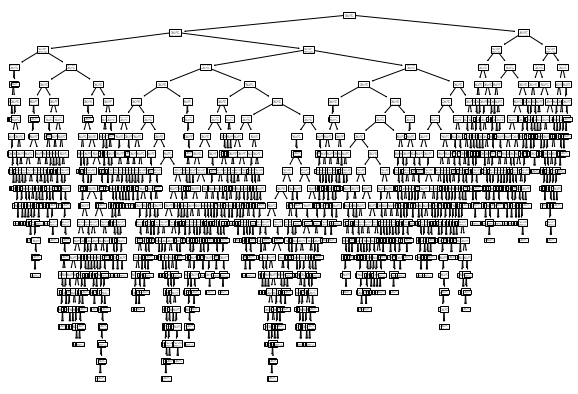

In [ ]:
plt.figure(figsize = (10,7))
plot_tree(dt)

plt.show()

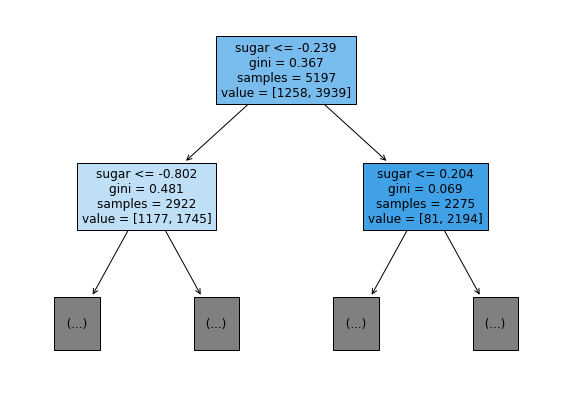

In [ ]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
print(dt.criterion)

gini


In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


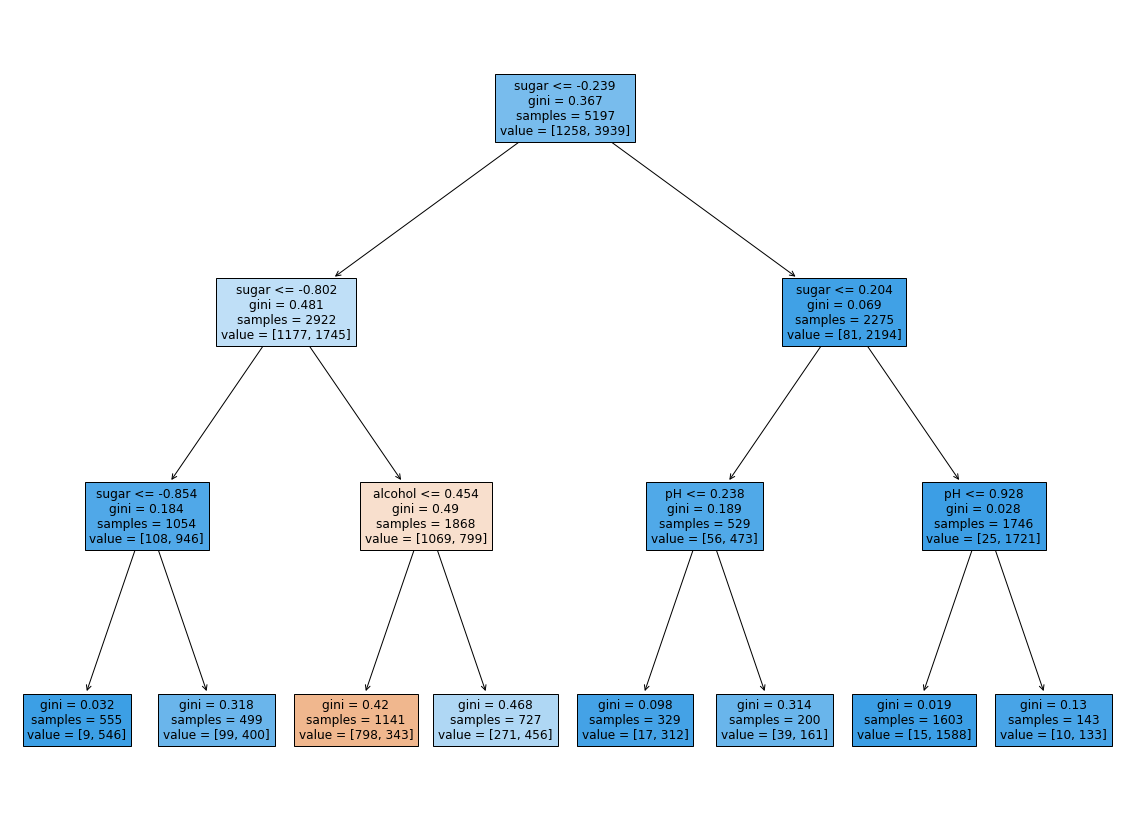

In [ ]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


In [ ]:
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


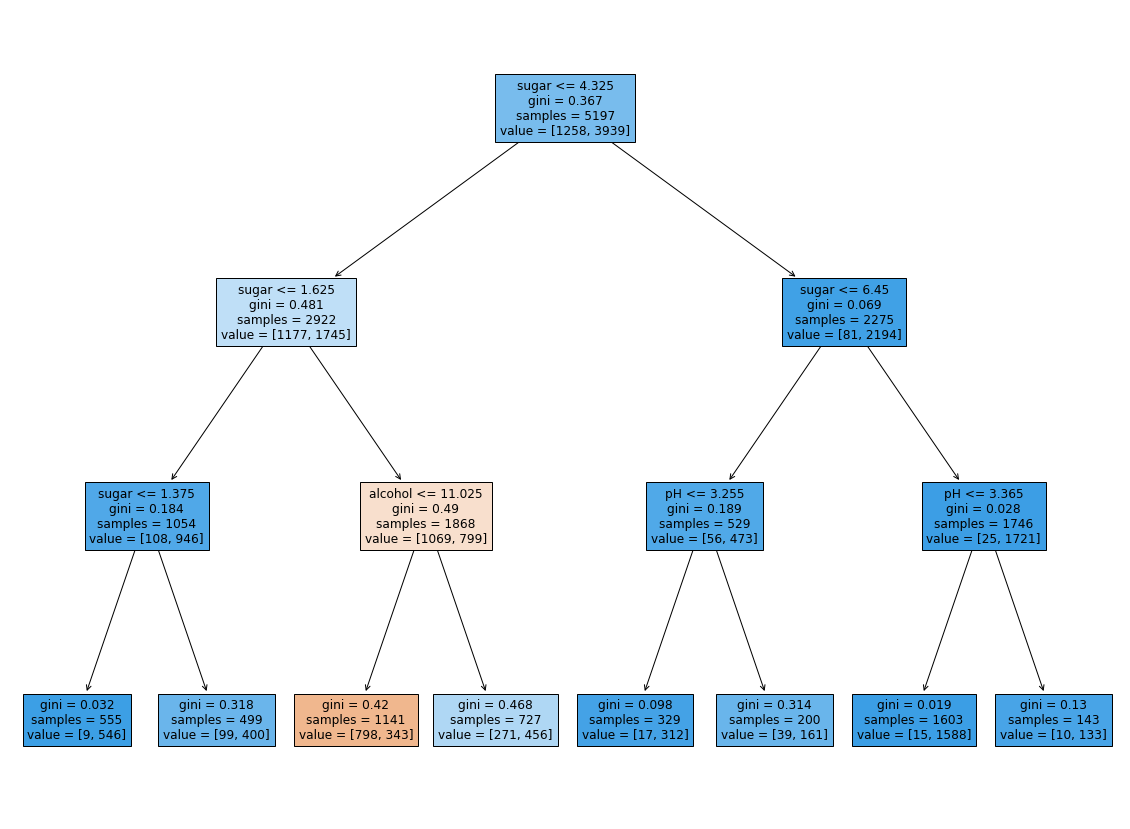

In [ ]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [35]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.25, random_state = 42)

In [37]:
print(sub_input.shape, val_input.shape)

(3897, 3) (1300, 3)


In [42]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
print(dt.score(test_input, test_target))

0.9969207082371054
0.86
0.8423076923076923


In [40]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01181483, 0.00919056, 0.00738597, 0.00718403, 0.00726032]), 'score_time': array([0.00111413, 0.00077701, 0.00071812, 0.00068092, 0.00075579]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [41]:
print(np.mean(scores['test_score']))

0.855300214703487


In [44]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [51]:
splitter = StratifiedKFold(n_splits=40, shuffle = True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(np.mean(scores['test_score']))

0.8647361359570661


In [52]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [53]:
gs = GridSearchCV(DecisionTreeClassifier(random_state =42), params, n_jobs = -1)

In [54]:
gs.fit(train_input, train_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
    

In [55]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [56]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [57]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [59]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5, 20, 1),
          'min_samples_split' : range(2,100,10)
          }

In [60]:
gs = GridSearchCV(DecisionTreeClassifier(random_state =42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'm

In [62]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [63]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [64]:
from scipy.stats import uniform, randint

In [66]:
rgen = randint(0, 10)
rgen.rvs(10)

array([5, 7, 7, 3, 7, 4, 5, 4, 2, 6])

In [68]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.41024829, 0.28362861, 0.43541826, 0.03764211, 0.97040768,
       0.03466165, 0.88061738, 0.76341403, 0.9460241 , 0.3399979 ])

In [69]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([106,  94, 104,  96,  98,  97,  96, 111, 102,  96]))

In [70]:
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20,50),
          'min_samples_split' : randint(2,25),
          'min_samples_leaf' : randint(1, 25)
          }

In [73]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), params, n_iter = 100, n_jobs = -1, random_state = 42)

In [74]:
gs.fit(train_input, train_target)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
         

In [75]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [76]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [77]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86
